<a href="https://colab.research.google.com/github/PouyaSonej/soft-exudate-segmentation-U-Net/blob/main/soft_exudates_segmentation_by_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras
import segmentation_models as sm
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

AttributeError: ignored

In [ ]:
import glob
import cv2
import os
images = glob.glob("/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/*.jpg")
images.sort()
masks = glob.glob("/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/*.tif")
masks.sort()

In [ ]:
for x in images:
    print(x)

/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_03.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_08.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_13.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_14.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_17.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_18.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_19.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_22.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_23.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_25.jpg
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/images/IDRiD_30.jpg
/kaggle/input/soft-exudates-segm

In [ ]:
for x in masks:
    print(x)

/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_03_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_08_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_13_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_14_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_17_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_18_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_19_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_22_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_23_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_25_SE.tif
/kaggle/input/soft-exudates-segmentation/soft exudates segmentation/masks/IDRiD_30_SE.tif
/kaggle/in

In [ ]:
import os
image=[]
mask=[]
for x,y in zip(images,masks):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(1024,1024))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(1024,1024),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)


In [ ]:
img_array=np.array(image)
mask_array=np.array(mask)
mask_array=mask_array.astype(np.float32)
print(mask_array.shape)

(40, 1024, 1024, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(img_array,mask_array,test_size=0.20)
print(y_train.dtype,y_test.dtype)

float32 float32


In [ ]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from tensorflow.keras.utils import plot_model
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'efficientnetb4'

preprocess_input = get_preprocessing(BACKBONE)
model = Unet(BACKBONE, encoder_weights='imagenet',input_shape=(1024,1024,3),activation='sigmoid')
#plot_model(model)

2023-01-17 06:20:14.733505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 06:20:14.814357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 06:20:14.815166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 06:20:14.816323: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

71901184/71892840 [==============================] - 8s 0us/step


In [ ]:
model.compile(optimizer='adam',loss=sm.losses.DiceLoss(),metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC(),sm.metrics.IOUScore(),sm.metrics.FScore()])

In [ ]:
history=model.fit(x_train,
          y_train,
          batch_size=1,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
32/32 [==============================] - 21s 658ms/step - loss: 0.6240 - recall: 0.6386 - precision: 0.9354 - auc: 0.8444 - iou_score: 0.2339 - f1-score: 0.3760 - val_loss: 0.8174 - val_recall: 0.3419 - val_precision: 0.6687 - val_auc: 0.6781 - val_iou_score: 0.1093 - val_f1-score: 0.1826
Epoch 2/20
32/32 [==============================] - 20s 631ms/step - loss: 0.6126 - recall: 0.6344 - precision: 0.9544 - auc: 0.8457 - iou_score: 0.2420 - f1-score: 0.3874 - val_loss: 0.8219 - val_recall: 0.2915 - val_precision: 0.8267 - val_auc: 0.6552 - val_iou_score: 0.1086 - val_f1-score: 0.1781
Epoch 3/20
32/32 [==============================] - 20s 633ms/step - loss: 0.6062 - recall: 0.6357 - precision: 0.9680 - auc: 0.8472 - iou_score: 0.2467 - f1-score: 0.3938 - val_loss: 0.8299 - val_recall: 0.2619 - val_precision: 0.8394 - val_auc: 0.6397 - val_iou_score: 0.1027 - val_f1-score: 0.1701
Epoch 4/20
32/32 [==============================] - 20s 634ms/step - loss: 0.6035 - recall: 0.637

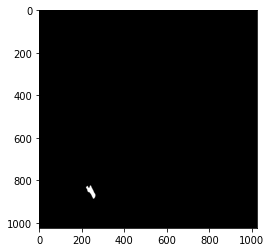

In [ ]:
test_preds = model.predict(x_test)
preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)
test_img = preds_test_thresh[0, :, :, 0]
plt.imshow(test_img, cmap='gray')

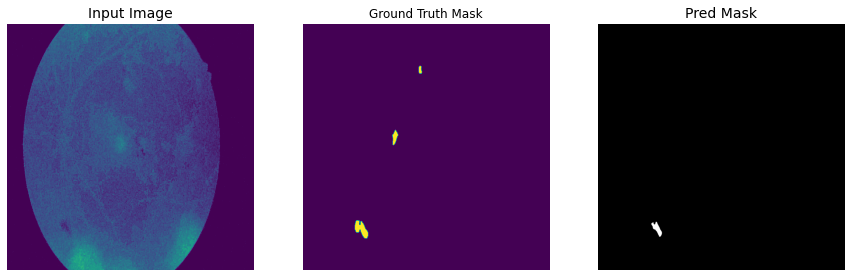

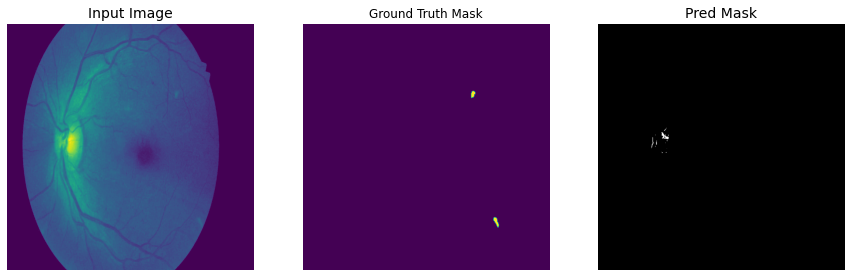

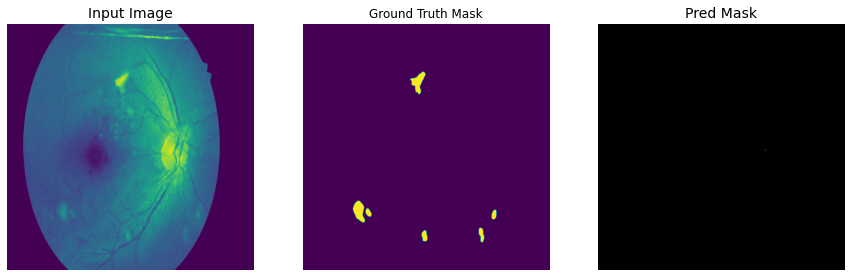

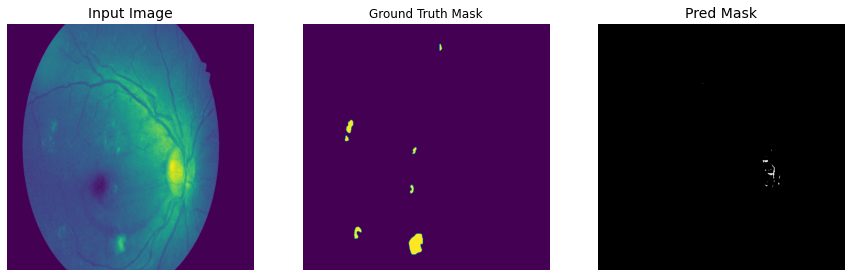

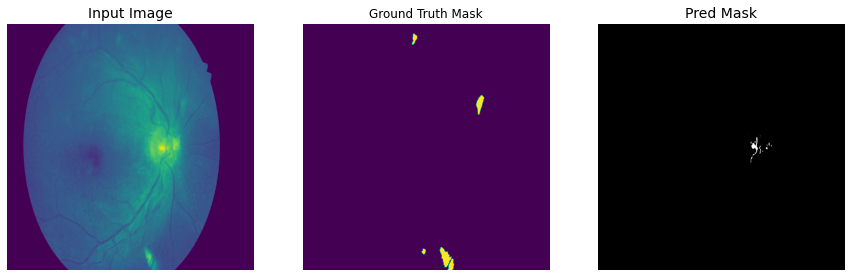

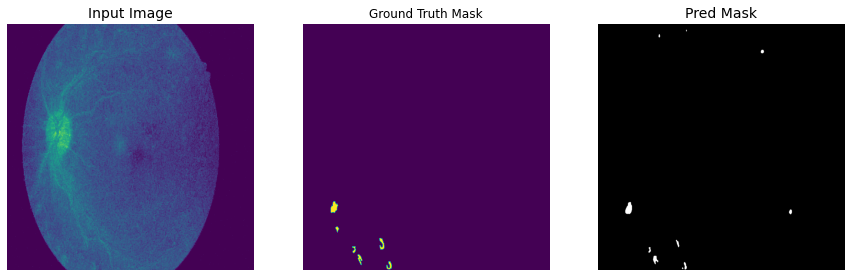

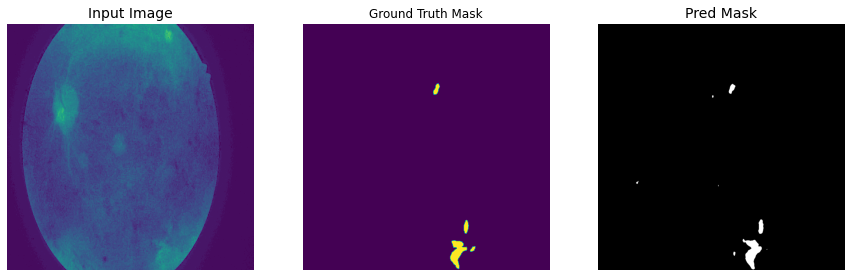

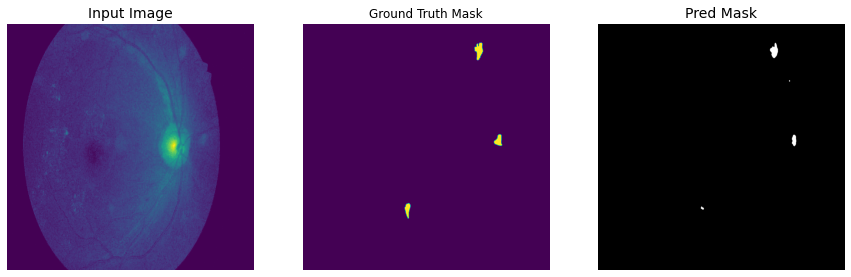

In [ ]:
for i in range(0,len(x_test)):
    plt.figure(figsize=(15,15))
    plt.axis('Off')
    test_image = x_test[i, :, :, 0]
    plt.subplot(1,3,1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_mask=y_test[i,:,:]
    plt.subplot(1,3,2)
    plt.imshow(test_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    test_mask = preds_test_thresh[i, :, :, 0]
    plt.subplot(1,3,3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')